##### import

In [1]:
# de los resultados generales crea silmulaciones con % de datos para que luego sean procesados
from elec_bol20 import *
import elec_bol20.util as ebu

##### open data

In [2]:
# abrimos la base de datos del 2019
df = ebu.open_combine_2019()
df['D_MAS_CC'] = df['MAS'] - df['CC']

#eliminamos los datos donde votos válidos son 0
df = df[df['VV']>0]

In [3]:
df

,ID_RECI,HAB,CC,MAS,PDC,VV,X,Y,PAIS,LAT,LON,DEN,REC,MUN,BOL,D_MAS_CC
ID_MESA,,,,,,,,,,,,,,,,
100320112000000101,1003201120000001,215,46,111,6,171,-64.273870,-21.007656,Bolivia,-19.161970,-65.265250,104.913759,Colegio Gregorio Pacheco,Yotala,True,65
100320112000000102,1003201120000001,219,57,110,10,187,-64.273870,-21.007656,Bolivia,-19.161970,-65.265250,104.913759,Colegio Gregorio Pacheco,Yotala,True,53
100320112000000103,1003201120000001,223,62,95,14,178,-64.273870,-21.007656,Bolivia,-19.161970,-65.265250,104.913759,Colegio Gregorio Pacheco,Yotala,True,33
100320112000000104,1003201120000001,219,54,93,5,169,-64.273870,-21.007656,Bolivia,-19.161970,-65.265250,104.913759,Colegio Gregorio Pacheco,Yotala,True,39
100320112000000105,1003201120000001,212,62,88,11,169,-64.273870,-21.007656,Bolivia,-19.161970,-65.265250,104.913759,Colegio Gregorio Pacheco,Yotala,True,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112137738202612004,1121377382026120,240,128,19,6,165,-53.854514,-8.399863,Suiza,46.224089,6.142583,2.094400,Centro Solidario Paquis,Ginebra,False,-109
112137738202612005,1121377382026120,239,129,19,5,162,-53.854514,-8.399863,Suiza,46.224089,6.142583,2.094400,Centro Solidario Paquis,Ginebra,False,-110
112137738202612006,1121377382026120,119,66,4,3,77,-53.854514,-8.399863,Suiza,46.224089,6.142583,2.094400,Centro Solidario Paquis,Ginebra,False,-62


## Predicción

<IPython.core.display.Javascript object>


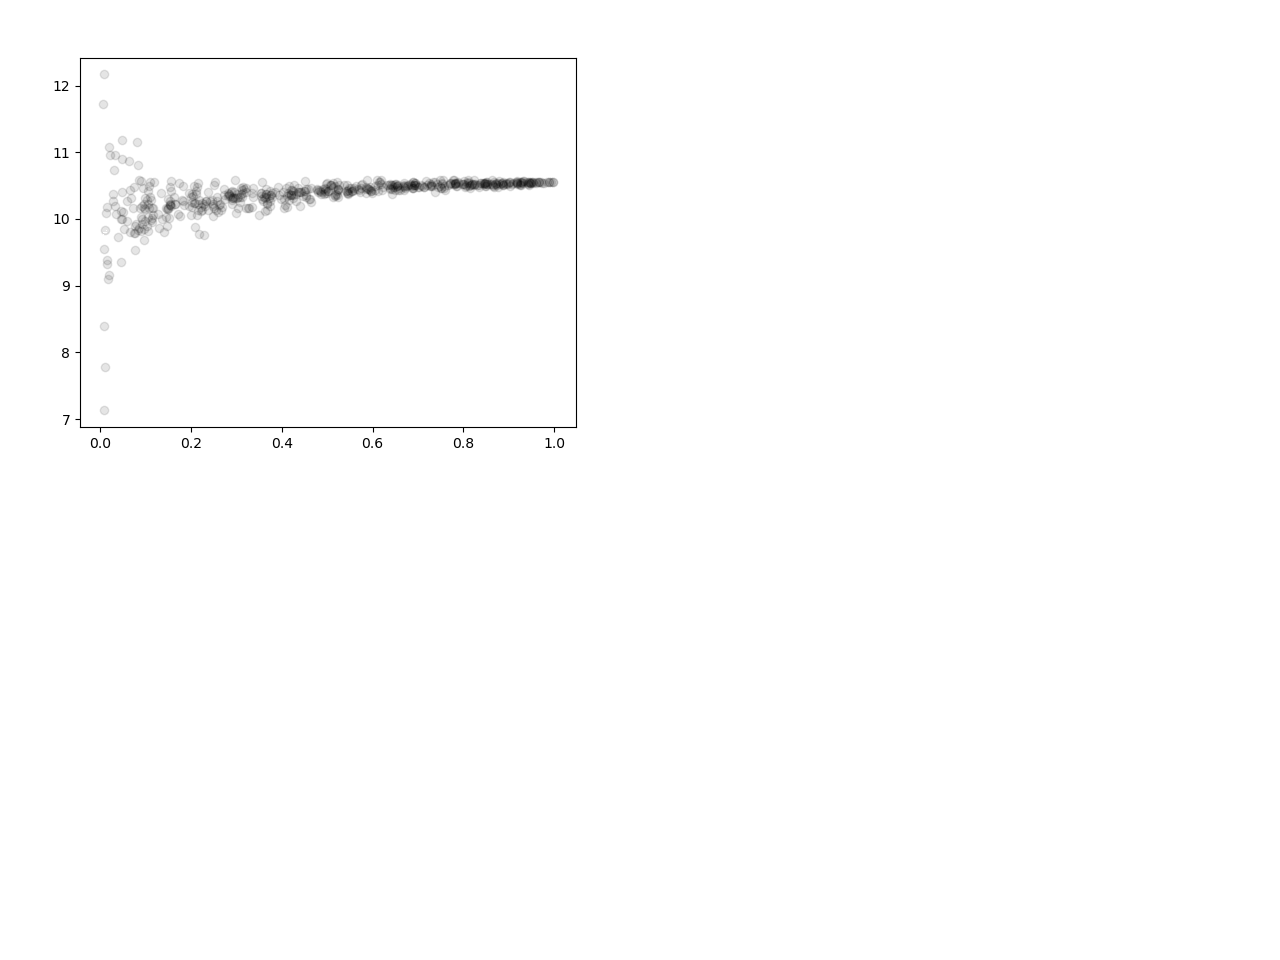

KeyboardInterrupt: 

In [270]:
%matplotlib notebook
f,ax = plt.subplots()
#partimos la base de datos en dos
for i in range(1000):
    np.random.seed(i)
    rr = np.random.rand(1)
    test,train = ebu.partition_df(df,rr)
    MAS_p  = ebu.predictor(train,test,'X','Y','HAB','MAS')
    D_MAS_CC = ebu.predictor(train,test,'X','Y','HAB','D_MAS_CC')
    VV_p = ebu.predictor(train,test,'X','Y','HAB','VV')
    actual_dmascc = df['D_MAS_CC'].sum()/df['VV'].sum()*100

    a = train['D_MAS_CC'].sum()
    b = D_MAS_CC.sum()
    c = train['VV'].sum()
    d = VV_p.sum()
    calc_dmascc = (a + b)/(c + d) * 100
    ax.scatter(rr,calc_dmascc,c='k',alpha=.1)
    f.canvas.draw()

In [ ]:
len(test), len(train)



## juntar

/Users/diego/miniconda3/envs/ebol20/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


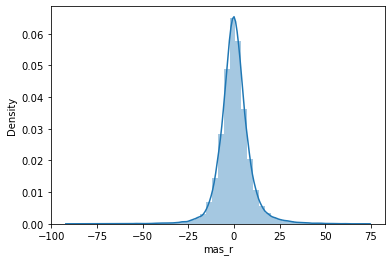

0.28751966151777797
0.028002877827272066


In [77]:
mas_p = MAS_p/VV_p * 100

test['mas'] = test['MAS']/test['VV'] * 100
train['mas'] = train['MAS']/train['VV'] *100
test['mas_p'] = mas_p
test['mas_r'] = test['mas'] - test['mas_p']
sns.distplot(test['mas_r']);plt.show()
print(test['mas_r'].mean())
print(test['mas_r'].median())

In [78]:
bokeh.plotting.output_notebook()
to = bokeh.models.HoverTool(tooltips=ebu.TOOL_TIPS)

_train = bokeh.models.ColumnDataSource(train)
_test = bokeh.models.ColumnDataSource(test)
_val = train
pa = ebu.P_MAS

mapper_t = bokeh.transform.linear_cmap(
    field_name='mas', palette=pa, low=0, high=80)
mapper_p = bokeh.transform.linear_cmap(
    field_name='mas_p', palette=pa, low=0, high=80)

mapper_d = bokeh.transform.linear_cmap(
    field_name='mas_p', palette=ebu.P_DIF, low=-100, high=100)

p = bokeh.plotting.figure(output_backend="webgl")
p.add_tools(to)
for t, l, c in zip([_train, _test, _test,_test],
                   ['train', 'test', 'result','dif'],
                   [mapper_t, mapper_p, mapper_t,mapper_d]):
    p.scatter('X', 'Y',
              # radius='r',
              fill_color=c, source=t,
              line_color=None,
              legend_label=l
              )
color_bar = bokeh.models.ColorBar(
    color_mapper=mapper_t['transform'],
    location=(1, 1)
)
p.add_layout(color_bar, 'left')
p.legend.location = "top_left"
p.legend.click_policy = "hide"
bokeh.plotting.output_file(os.path.join(ebu.DATA_FIG_OUT,'asdf.html'))
# bokeh.plotting.show(p,browser='safari/Applications/)/

Loading BokehJS ...